# Sartorious experiments data-plotting code

In [2]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Importing files
std = '505'

folder1 = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Cleaned_Data")
df_man = pd.read_csv(folder1+r'/Viscosity_std_'+std+'_modified.csv')

df_exp2 = pd.read_csv(folder1+r'/Viscosity_std_'+std+'_exp2_modified.csv')

df_exp3 = pd.read_csv(folder1+r'/Viscosity_std_'+std+'_exp3_modified.csv')


#### Line plot for manual calibration alone

In [ ]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

# Plotting graph 1: Iteration against error
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', label = '1000', c = 'red')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', label = '500', c = 'green')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', label = '300', c = 'blue')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', label = '100', c = 'grey')

if len(df_man_1000) != 0:
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], label = 'Manual Calibration', c = 'magenta')
if len(df_man_500) != 0:
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], c = 'magenta')
if len(df_man_100) != 0:
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')

axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_man_1000['iteration'],df_man_1000['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

# folder = folder = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Finalised_Data")
# fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_line.png')


#### Line plot for manual calibration + BOTorch experiment 2 (no mean)

In [ ]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows (manual)
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

# Dropping NAN rows (exp2)
df_exp2_1000 = df_exp2.where(df_exp2.volume==1000).dropna(how='all')
df_exp2_500 = df_exp2.where(df_exp2.volume==500).dropna(how='all')
df_exp2_300 = df_exp2.where(df_exp2.volume==300).dropna(how='all')
df_exp2_100 = df_exp2.where(df_exp2.volume==100).dropna(how='all')

# Plotting graph 1: Iteration against error
# Scatterplot for manual calibration
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', label = '1000', c = 'red')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', label = '500', c = 'green')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', label = '300', c = 'blue')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', label = '100', c = 'grey')

# Scatterplot for experiment 2
if len(df_exp2_1000) != 0:
    axs[0].scatter(df_exp2_1000['iteration'],df_exp2_1000['%error'], marker= 'x', c = 'red')
if len(df_exp2_500) != 0:
    axs[0].scatter(df_exp2_500['iteration'],df_exp2_500['%error'], marker= 'x', c = 'green')
if len(df_exp2_300) != 0:
    axs[0].scatter(df_exp2_300['iteration'],df_exp2_300['%error'], marker= 'x', c = 'blue')
if len(df_exp2_100) != 0:
    axs[0].scatter(df_exp2_100['iteration'],df_exp2_100['%error'], marker= 'x', c = 'grey')

# Line plot for manual calibration
if len(df_man_1000) != 0:
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], label = 'Human Driven', c = 'magenta')
if len(df_man_500) != 0:
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], c = 'magenta')
if len(df_man_100) != 0:
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')

# Line plot for experiment 2
if len(df_exp2_1000) != 0:
    axs[0].plot(df_exp2_1000['iteration'],df_exp2_1000['%error'], label = 'ML Driven', c = 'black')
if len(df_exp2_500) != 0:
    axs[0].plot(df_exp2_500['iteration'],df_exp2_500['%error'], c = 'black')
if len(df_exp2_300) != 0:
    axs[0].plot(df_exp2_300['iteration'],df_exp2_300['%error'], c = 'black')
if len(df_exp2_100) != 0:
    axs[0].plot(df_exp2_100['iteration'],df_exp2_100['%error'], c = 'black')

# Reference lines
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)

# Figure 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# 2nd figure line graph for manual calibration
axs[1].plot(df_man_1000['iteration'],df_man_1000['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')

# 2nd figure line graph for experiment 2
axs[1].plot(df_exp2['iteration'],df_exp2['time_asp_1000'], marker= 'x', label = 'ML Driven ', c = 'black')

# Figure 1 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Figure formatting
fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_exp2_random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

# Saving the graphs
folder = folder = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Finalised_Data")
fig.savefig(folder+r'/'+'Viscosity_std_'+std+'exp2_line.png')

#### Line plot for manual calibration + BOTorch experiment 3 (mean)

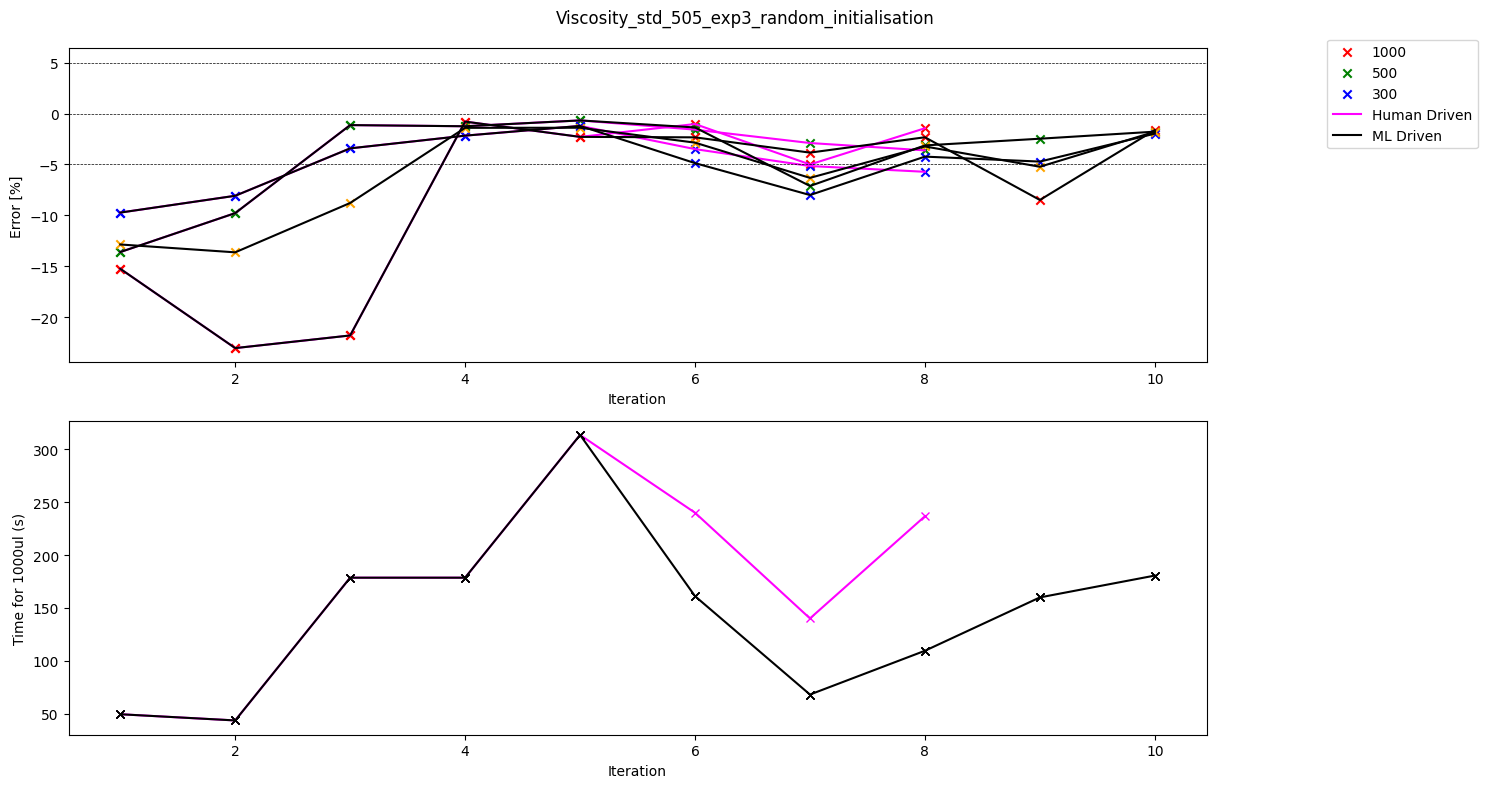

In [3]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows (manual)
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all') 
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

# Dropping NAN rows (exp3)
# df_exp3_1000 = df_exp3.where((df_exp3.volume=='1000.0') or (df_exp3.volume=='1000')).dropna(how='all')
# df_exp3_500 = df_exp3.where((df_exp3.volume=='500.0') or (df_exp3.volume=='500')).dropna(how='all')
# df_exp3_300 = df_exp3.where((df_exp3.volume=='300.0') or (df_exp3.volume=='300')).dropna(how='all')
# df_exp3_100 = df_exp3.where((df_exp3.volume=='100.0') or (df_exp3.volume=='100')).dropna(how='all')
df_exp3_1000 = df_exp3.loc[(df_exp3['volume'] == '1000.0') | (df_exp3['volume'] == '1000')].dropna(how='all')
df_exp3_500 = df_exp3.loc[(df_exp3['volume'] == '500.0') | (df_exp3['volume'] == '500')].dropna(how='all')
df_exp3_300 = df_exp3.loc[(df_exp3['volume'] == '300.0') | (df_exp3['volume'] == '300')].dropna(how='all')
df_exp3_100 = df_exp3.loc[(df_exp3['volume'] == '100.0') | (df_exp3['volume'] == '100')].dropna(how='all')
df_exp3_mean = df_exp3.loc[(df_exp3['volume'] == 'mean[300, 500, 1000]')].dropna(how='all')

# Plotting graph 1: Iteration against error
# Scatterplot for manual calibration
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', label = '1000', c = 'red')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', label = '500', c = 'green')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', label = '300', c = 'blue')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', label = '100', c = 'grey')

# Scatterplot for experiment 3
if len(df_exp3_1000) != 0:
    axs[0].scatter(df_exp3_1000['iteration'],df_exp3_1000['%error'], marker= 'x', c = 'red')
if len(df_exp3_500) != 0:
    axs[0].scatter(df_exp3_500['iteration'],df_exp3_500['%error'], marker= 'x', c = 'green')
if len(df_exp3_300) != 0:
    axs[0].scatter(df_exp3_300['iteration'],df_exp3_300['%error'], marker= 'x', c = 'blue')
if len(df_exp3_100) != 0:
    axs[0].scatter(df_exp3_100['iteration'],df_exp3_100['%error'], marker= 'x', c = 'grey')
if len(df_exp3_mean) != 0:
    axs[0].scatter(df_exp3_mean['iteration'],df_exp3_mean['%error'], marker= 'x', c = 'orange')

# Line plot for manual calibration
if len(df_man_1000) != 0:
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], label = 'Human Driven', c = 'magenta')
if len(df_man_500) != 0:
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], c = 'magenta')
if len(df_man_100) != 0:
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')

# Line plot for experiment 3
if len(df_exp3_1000) != 0:
    axs[0].plot(df_exp3_1000['iteration'],df_exp3_1000['%error'], label = 'ML Driven', c = 'black')
if len(df_exp3_500) != 0:
    axs[0].plot(df_exp3_500['iteration'],df_exp3_500['%error'], c = 'black')
if len(df_exp3_300) != 0:
    axs[0].plot(df_exp3_300['iteration'],df_exp3_300['%error'], c = 'black')
if len(df_exp3_100) != 0:
    axs[0].plot(df_exp3_100['iteration'],df_exp3_100['%error'], c = 'black')
if len(df_exp3_mean) != 0:
    axs[0].plot(df_exp3_mean['iteration'],df_exp3_mean['%error'], c = 'black')

# Reference lines
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)

# Figure 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# 2nd figure line graph for manual calibration
axs[1].plot(df_man_1000['iteration'],df_man_1000['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')

# 2nd figure line graph for experiment 2
axs[1].plot(df_exp3['iteration'],df_exp3['time_asp_1000'], marker= 'x', label = 'ML Driven ', c = 'black')

# Figure 1 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Figure formatting
fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_exp3_random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

# Saving the graphs
# folder = folder = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Finalised_Data")
# fig.savefig(folder+r'/'+'Viscosity_std_'+std+'exp3_line.png')